# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

# OBSERVATIONS
----

* The temperature is highest just above the equator around 20 to 40 degrees latitude.  This temperature being higher in this area instead of the equator could be due to the earth being tilted 23.5 degrees from plane of orbit.
* There's more cloud coverage where temperatures are higher.
* Wind speed did not seem to affect cloud coverage, humidty or temperature.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
units = "imperial"

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

591

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

In [3]:
base_url = "http://api.openweathermap.org/data/2.5/weather?"
name = []
lng = []
lat = []
maxtemp = []
humid = []
cloud = []
windspd = []
country = []
datetime = []

city_number = 0
set_num = 1

for city in cities:
    q_url = f"{base_url}q={city}&units={units}&appid={weather_api_key}"
    weather_resp = requests.get(q_url).json()

    try:
        city_number += 1
        
        name.append(weather_resp['name'])
        lng.append(weather_resp['coord']['lon'])
        lat.append(weather_resp['coord']['lat'])
        maxtemp.append(weather_resp['main']['temp_max'])
        humid.append(weather_resp['main']['humidity'])
        cloud.append(weather_resp['clouds']['all'])
        windspd.append(weather_resp['wind']['speed'])
        country.append(weather_resp['sys']['country'])
        datetime.append(weather_resp['dt'])
        

        print(f"Processing Record {city_number} of Set {set_num} | {city}")


    except (KeyError, IndexError):
        print("City not found. Skipping...")
        pass
    if city_number == 50:
        set_num += 1
        city_number = 0

Processing Record 1 of Set 1 | cabo san lucas
Processing Record 2 of Set 1 | puerto ayora
Processing Record 3 of Set 1 | carnarvon
Processing Record 4 of Set 1 | kawhia
Processing Record 5 of Set 1 | torbay
Processing Record 6 of Set 1 | mataura
Processing Record 7 of Set 1 | soe
Processing Record 8 of Set 1 | cape town
Processing Record 9 of Set 1 | guiratinga
Processing Record 10 of Set 1 | port elizabeth
Processing Record 11 of Set 1 | coari
Processing Record 12 of Set 1 | gardelegen
Processing Record 13 of Set 1 | port lincoln
City not found. Skipping...
Processing Record 15 of Set 1 | severo-kurilsk
Processing Record 16 of Set 1 | albany
Processing Record 17 of Set 1 | lethbridge
Processing Record 18 of Set 1 | gangapur
Processing Record 19 of Set 1 | chuy
Processing Record 20 of Set 1 | trairi
Processing Record 21 of Set 1 | tiksi
Processing Record 22 of Set 1 | ponta do sol
Processing Record 23 of Set 1 | port alfred
Processing Record 24 of Set 1 | busselton
Processing Record 25

Processing Record 7 of Set 5 | rafai
Processing Record 8 of Set 5 | sinnamary
City not found. Skipping...
Processing Record 10 of Set 5 | riverton
Processing Record 11 of Set 5 | fuling
Processing Record 12 of Set 5 | mahebourg
City not found. Skipping...
Processing Record 14 of Set 5 | neiafu
Processing Record 15 of Set 5 | klaksvik
Processing Record 16 of Set 5 | dunedin
Processing Record 17 of Set 5 | kichera
Processing Record 18 of Set 5 | ballangen
Processing Record 19 of Set 5 | coihaique
Processing Record 20 of Set 5 | nyrob
Processing Record 21 of Set 5 | fukuma
Processing Record 22 of Set 5 | road town
City not found. Skipping...
City not found. Skipping...
Processing Record 25 of Set 5 | arman
Processing Record 26 of Set 5 | port hardy
Processing Record 27 of Set 5 | amalapuram
Processing Record 28 of Set 5 | casa nova
City not found. Skipping...
Processing Record 30 of Set 5 | makasar
Processing Record 31 of Set 5 | asilah
City not found. Skipping...
Processing Record 33 of 

City not found. Skipping...
Processing Record 14 of Set 9 | george
Processing Record 15 of Set 9 | safaga
Processing Record 16 of Set 9 | muroto
Processing Record 17 of Set 9 | tupik
Processing Record 18 of Set 9 | lodja
Processing Record 19 of Set 9 | tymovskoye
Processing Record 20 of Set 9 | te anau
Processing Record 21 of Set 9 | miri
Processing Record 22 of Set 9 | kwekwe
Processing Record 23 of Set 9 | fairmont
Processing Record 24 of Set 9 | erenhot
Processing Record 25 of Set 9 | broome
Processing Record 26 of Set 9 | chapais
Processing Record 27 of Set 9 | los andes
Processing Record 28 of Set 9 | shetpe
Processing Record 29 of Set 9 | xining
Processing Record 30 of Set 9 | vardo
Processing Record 31 of Set 9 | glazov
Processing Record 32 of Set 9 | aktash
Processing Record 33 of Set 9 | lyantonde
Processing Record 34 of Set 9 | riosucio
Processing Record 35 of Set 9 | necochea
Processing Record 36 of Set 9 | kapit
Processing Record 37 of Set 9 | mossendjo
Processing Record 38

In [4]:
city_summary = pd.DataFrame({"City Name": name,
                            "Longitude": lng,
                            "Latitude": lat,
                            "Max Temperature": maxtemp,
                            "Humidity": humid,
                            "Cloud Coverage": cloud,
                            "Wind Speed": windspd,
                            "City Country": country,
                            "Date Time": datetime})
city_summary.head()

,City Name,Longitude,Latitude,Max Temperature,Humidity,Cloud Coverage,Wind Speed,City Country,Date Time
0,Cabo San Lucas,-109.91,22.89,91.0,58,20,14.99,MX,1594675620
1,Puerto Ayora,-90.35,-0.74,70.0,90,56,1.01,EC,1594675748
2,Carnarvon,113.63,-24.87,60.8,93,75,4.70,AU,1594675748
3,Kawhia,174.82,-38.07,57.0,97,100,5.99,NZ,1594675749
4,Torbay,-52.73,47.67,77.0,78,20,17.22,CA,1594675749


In [5]:
# Pulling Date data for charts
from datetime import datetime
val = city_summary.iat[0,8]
cs_dt = datetime.fromtimestamp(val).strftime('%m-%d-%Y')

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
# Export csv
city_sum_output = city_summary.to_csv("../output_data/cities.csv", index=False)

In [7]:
city_sum_path = "../output_data/cities.csv"
city_sum_csv = pd.read_csv(city_sum_path)
city_sum_csv

,City Name,Longitude,Latitude,Max Temperature,Humidity,Cloud Coverage,Wind Speed,City Country,Date Time
0,Cabo San Lucas,-109.91,22.89,91.00,58,20,14.99,MX,1594675620
1,Puerto Ayora,-90.35,-0.74,70.00,90,56,1.01,EC,1594675748
2,Carnarvon,113.63,-24.87,60.80,93,75,4.70,AU,1594675748
3,Kawhia,174.82,-38.07,57.00,97,100,5.99,NZ,1594675749
4,Torbay,-52.73,47.67,77.00,78,20,17.22,CA,1594675749
...,...,...,...,...,...,...,...,...,...
537,Ballina,153.57,-28.87,50.00,66,0,12.75,AU,1594675880
538,Mporokoso,30.12,-9.37,59.41,60,0,7.45,ZM,1594675880
539,Vestmannaeyjar,-20.27,63.44,51.96,84,100,5.06,IS,1594675880
540,Pundaguitan,126.17,6.37,83.21,70,95,2.89,PH,1594675881


 this step if there are no cities that have humidity > 100%. 

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
#  Get the indices of cities that have humidity over 100%.
city_sum_csv.describe()

,Longitude,Latitude,Max Temperature,Humidity,Cloud Coverage,Wind Speed,Date Time
count,542.000000,542.000000,542.000000,542.000000,542.000000,542.000000,5.420000e+02
mean,26.719170,19.439096,67.636993,71.258303,47.734317,7.522066,1.594676e+09
std,88.868238,33.854676,14.561632,20.235026,38.091672,5.358881,6.270242e+01
min,-175.200000,-54.800000,32.000000,3.000000,0.000000,0.220000,1.594675e+09
25%,-50.877500,-8.402500,56.745000,59.000000,5.000000,3.360000,1.594676e+09
50%,28.760000,21.120000,69.365000,77.000000,42.000000,6.040000,1.594676e+09
75%,108.295000,49.780000,78.442500,87.000000,87.750000,10.675000,1.594676e+09
max,179.320000,78.220000,109.000000,100.000000,100.000000,30.090000,1.594676e+09


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

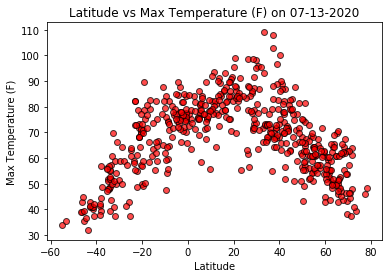

In [9]:
plt.scatter(city_sum_csv["Latitude"], city_sum_csv["Max Temperature"], marker="o", facecolors="red", edgecolors="black", alpha=0.7)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title(f"Latitude vs Max Temperature (F) on {cs_dt}")
plt.savefig("../output_data/Fig1.png")
plt.show()

* The max temperature is higher the closer it is to the equator (0).  The further away from 0 degrees, the colder the temperature.

## Latitude vs. Humidity Plot

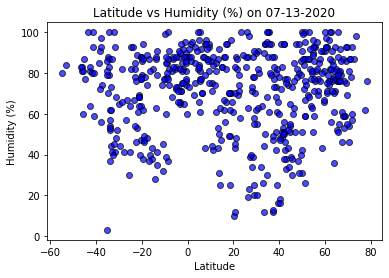

In [10]:
plt.scatter(city_sum_csv["Latitude"], city_sum_csv["Humidity"], marker="o", facecolors="blue", edgecolors="black", alpha=0.7)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"Latitude vs Humidity (%) on {cs_dt}")
plt.savefig("../output_data/Fig2.png")
plt.show()

* Humidity runs mostly from 60% to 100% throughout full range of latitude except with more variations at -20 degrees and between 20 - 40 degrees latitude

## Latitude vs. Cloudiness Plot

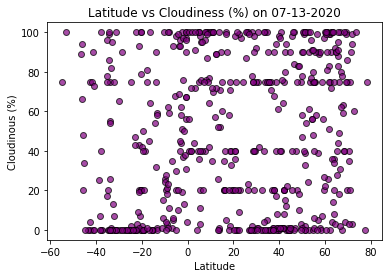

In [11]:
plt.scatter(city_sum_csv["Latitude"], city_sum_csv["Cloud Coverage"], marker="o", facecolors="purple", edgecolors="black", alpha=0.7)
plt.xlabel("Latitude")
plt.ylabel("Cloudinous (%)")
plt.title(f"Latitude vs Cloudiness (%) on {cs_dt}")
plt.savefig("../output_data/Fig3.png")
plt.show()

* The equator (0) has a lot of cloud cover while other latitude positions have a mix of a lot of cloud coverage and no cloud coverage.

## Latitude vs. Wind Speed Plot

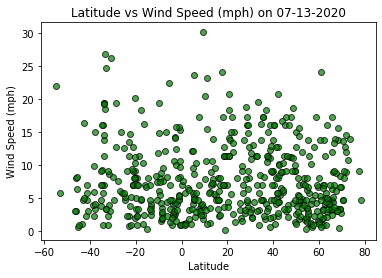

In [12]:
plt.scatter(city_sum_csv["Latitude"], city_sum_csv["Wind Speed"], marker="o", facecolors="green", edgecolors="black", alpha=0.7)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f"Latitude vs Wind Speed (mph) on {cs_dt}")
plt.savefig("../output_data/Fig4.png")
plt.show()

* Majority of windspeed from -40 to 70 degrees latitude and runs from 0 to 15 mph

## Linear Regression

In [13]:
# OPTIONAL: Create a function to create Linear Regression plots

*Your second requirement is to run linear regression on each relationship, only this time separating them into Northern Hemisphere (greater than or equal to 0 degrees latitude) and Southern Hemisphere (less than 0 degrees latitude):

In [14]:
# Create Northern and Southern Hemisphere DataFrames
northern = city_sum_csv.loc[city_sum_csv['Latitude']>=0]
northern

,City Name,Longitude,Latitude,Max Temperature,Humidity,Cloud Coverage,Wind Speed,City Country,Date Time
0,Cabo San Lucas,-109.91,22.89,91.00,58,20,14.99,MX,1594675620
4,Torbay,-52.73,47.67,77.00,78,20,17.22,CA,1594675749
11,Gardelegen,11.40,52.53,61.00,69,24,4.85,DE,1594675750
13,Severo-Kuril'sk,156.12,50.68,49.19,87,100,5.55,RU,1594675751
14,Albany,-73.97,42.60,87.01,42,15,10.11,US,1594675751
...,...,...,...,...,...,...,...,...,...
532,Businga,20.88,3.33,71.15,93,100,1.88,CD,1594675879
533,Kloulklubed,134.26,7.04,77.00,88,75,4.70,PW,1594675879
539,Vestmannaeyjar,-20.27,63.44,51.96,84,100,5.06,IS,1594675880
540,Pundaguitan,126.17,6.37,83.21,70,95,2.89,PH,1594675881


In [15]:
# Pulling Date data for charts
n_val = northern.iat[0,8]
n_dt = datetime.fromtimestamp(n_val).strftime('%m-%d-%Y')

In [16]:
southern = city_sum_csv.loc[city_sum_csv['Latitude']<0]
southern

,City Name,Longitude,Latitude,Max Temperature,Humidity,Cloud Coverage,Wind Speed,City Country,Date Time
1,Puerto Ayora,-90.35,-0.74,70.00,90,56,1.01,EC,1594675748
2,Carnarvon,113.63,-24.87,60.80,93,75,4.70,AU,1594675748
3,Kawhia,174.82,-38.07,57.00,97,100,5.99,NZ,1594675749
5,Mataura,168.86,-46.19,39.00,83,94,3.00,NZ,1594675749
6,Soe,124.28,-9.86,61.79,99,26,6.04,ID,1594675749
...,...,...,...,...,...,...,...,...,...
534,Tres Arroyos,-60.28,-38.37,37.65,72,0,9.84,AR,1594675879
535,Poum,164.02,-20.23,73.38,77,100,20.13,NC,1594675880
536,Indramayu,108.32,-6.33,78.01,83,6,8.16,ID,1594675880
537,Ballina,153.57,-28.87,50.00,66,0,12.75,AU,1594675880


In [17]:
# Pulling Date data for charts
s_val = southern.iat[0,8]
s_dt = datetime.fromtimestamp(s_val).strftime('%m-%d-%Y')

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.47613064776005565


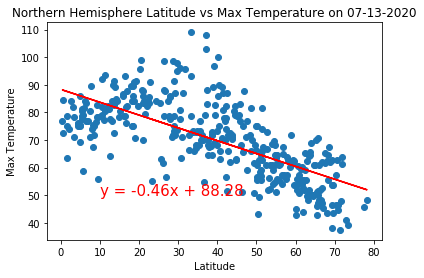

In [18]:
n_lat = northern["Latitude"]
n_mtemp = northern["Max Temperature"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(n_lat, n_mtemp)
n_lat_temp_regress = n_lat * slope + intercept
n_lat_temp_line = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(n_lat, n_mtemp)
plt.plot(n_lat, n_lat_temp_regress, "r-")
plt.annotate(n_lat_temp_line,(10, 50), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.title(f"Northern Hemisphere Latitude vs Max Temperature on {n_dt}")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("../output_data/Fig5.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6566439602449399


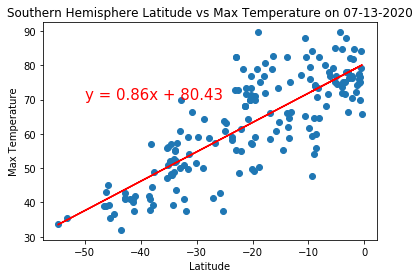

In [19]:
s_lat = southern["Latitude"]
s_mtemp = southern["Max Temperature"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(s_lat, s_mtemp)
s_lat_temp_regress = s_lat * slope + intercept
s_lat_temp_line = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(s_lat, s_mtemp)
plt.plot(s_lat, s_lat_temp_regress, "r-")
plt.annotate(s_lat_temp_line,(-50, 70), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.title(f"Southern Hemisphere Latitude vs Max Temperature on {s_dt}")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("../output_data/Fig6.png")
plt.show()

## Northern Southern Hemisphere - Max Temp and Latitude
The higher the latitude is in the Northern hemisphere, the lower the temperature is, except around 20 - 40 degrees, as it's approaching the North Pole/Arctic Circle.  The temperature rises int he Southern hemisphere as it moves away from the South Pole/Antartica.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0008695885048134968


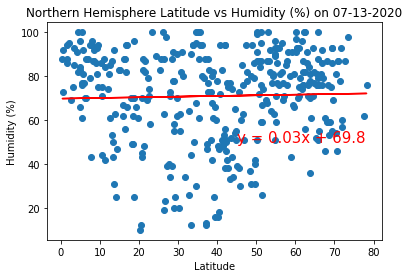

In [20]:
n_hum = northern["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(n_lat, n_hum)
n_lat_hum_regress = n_lat * slope + intercept
n_lat_hum_line = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(n_lat, n_hum)
plt.plot(n_lat, n_lat_hum_regress, "r-")
plt.annotate(n_lat_hum_line,(45, 50), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"Northern Hemisphere Latitude vs Humidity (%) on {n_dt}")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("../output_data/Fig7.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression


The r-squared is: 0.006963143035899493


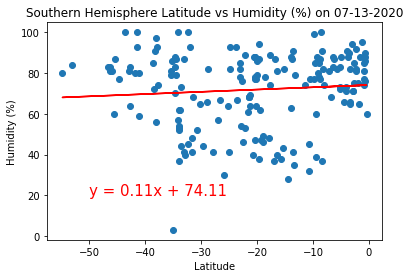

In [21]:
s_hum = southern["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(s_lat, s_hum)
s_lat_hum_regress = s_lat * slope + intercept
s_lat_hum_line = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(s_lat, s_hum)
plt.plot(s_lat, s_lat_hum_regress, "r-")
plt.annotate(s_lat_hum_line,(-50, 20), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"Southern Hemisphere Latitude vs Humidity (%) on {s_dt}")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("../output_data/Fig8.png")
plt.show()

## Northern Southern Latitude and Humidity
Humidity percentage is higher around the equator (0) and decreases as it moves away.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 3.809631565723602e-05


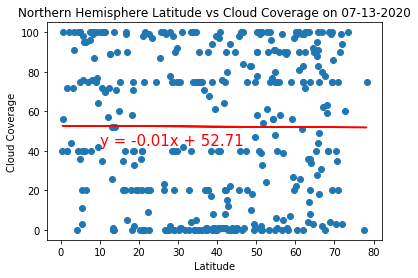

In [22]:
n_cld = northern["Cloud Coverage"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(n_lat, n_cld)
n_lat_cld_regress = n_lat * slope + intercept
n_lat_cld_line = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(n_lat, n_cld)
plt.plot(n_lat, n_lat_cld_regress, "r-")
plt.annotate(n_lat_cld_line,(10, 43), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloud Coverage")
plt.title(f"Northern Hemisphere Latitude vs Cloud Coverage on {n_dt}")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("../output_data/Fig9.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.010231226797884217


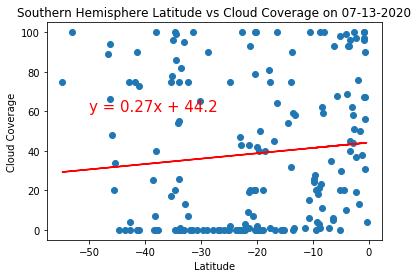

In [23]:
s_cld = southern["Cloud Coverage"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(s_lat, s_cld)
s_lat_cld_regress = s_lat * slope + intercept
s_lat_cld_line = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(s_lat, s_cld)
plt.plot(s_lat, s_lat_cld_regress, "r-")
plt.annotate(s_lat_cld_line,(-50, 60), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloud Coverage")
plt.title(f"Southern Hemisphere Latitude vs Cloud Coverage on {s_dt}")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("../output_data/Fig10.png")
plt.show()

## North South Lat and Cloudiness
Cloud coverage percentage cluster mostly around 0%, 40%, 80% and 100% regardless of position in latitude.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.003576273775416145


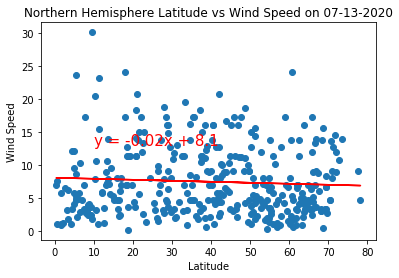

In [24]:
n_wind = northern["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(n_lat, n_wind)
n_lat_wind_regress = n_lat * slope + intercept
n_lat_wind_line = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(n_lat, n_wind)
plt.plot(n_lat, n_lat_wind_regress, "r-")
plt.annotate(n_lat_wind_line,(10, 13), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title(f"Northern Hemisphere Latitude vs Wind Speed on {n_dt}")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("../output_data/Fig11.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.012053240425829491


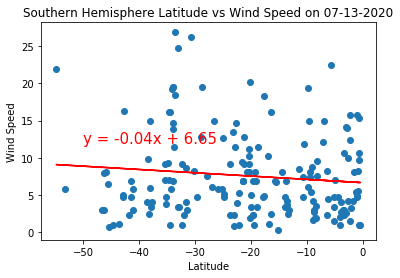

In [25]:
s_wind = southern["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(s_lat, s_wind)
s_lat_wind_regress = s_lat * slope + intercept
s_lat_wind_line = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(s_lat, s_wind)
plt.plot(s_lat, s_lat_wind_regress, "r-")
plt.annotate(s_lat_wind_line,(-50, 12), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title(f"Southern Hemisphere Latitude vs Wind Speed on {s_dt}")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("../output_data/Fig12.png")
plt.show()

## North South Lat and Wind Speed
Majority of wind speed does not go higher than 15 mph.  There are some which leave that range but most stay around 15 mph or lower.